<a href="https://colab.research.google.com/github/sandipanpaul21/Logistic-regression-in-python/blob/main/15_LR_WOE_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

**Weight of Evidence (WoE)**
- The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. 
- Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. 
- "Bad Customers" refers to the customers who defaulted on a loan. 
- "Good Customers" refers to the customers who paid back loan.

      WoE = Ln( % of Good / % of Bad)

**Steps of Calculating WOE**

1. For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
2. Calculate the number of events and non-events in each group (bin)
3. Calculate the % of events and % of non-events in each group.
4. Calculate WOE by taking natural log of division of % of non-events and % of events

**Note :** For a categorical variable, you do not need to split the data (Ignore Step 1 and follow the remaining steps)


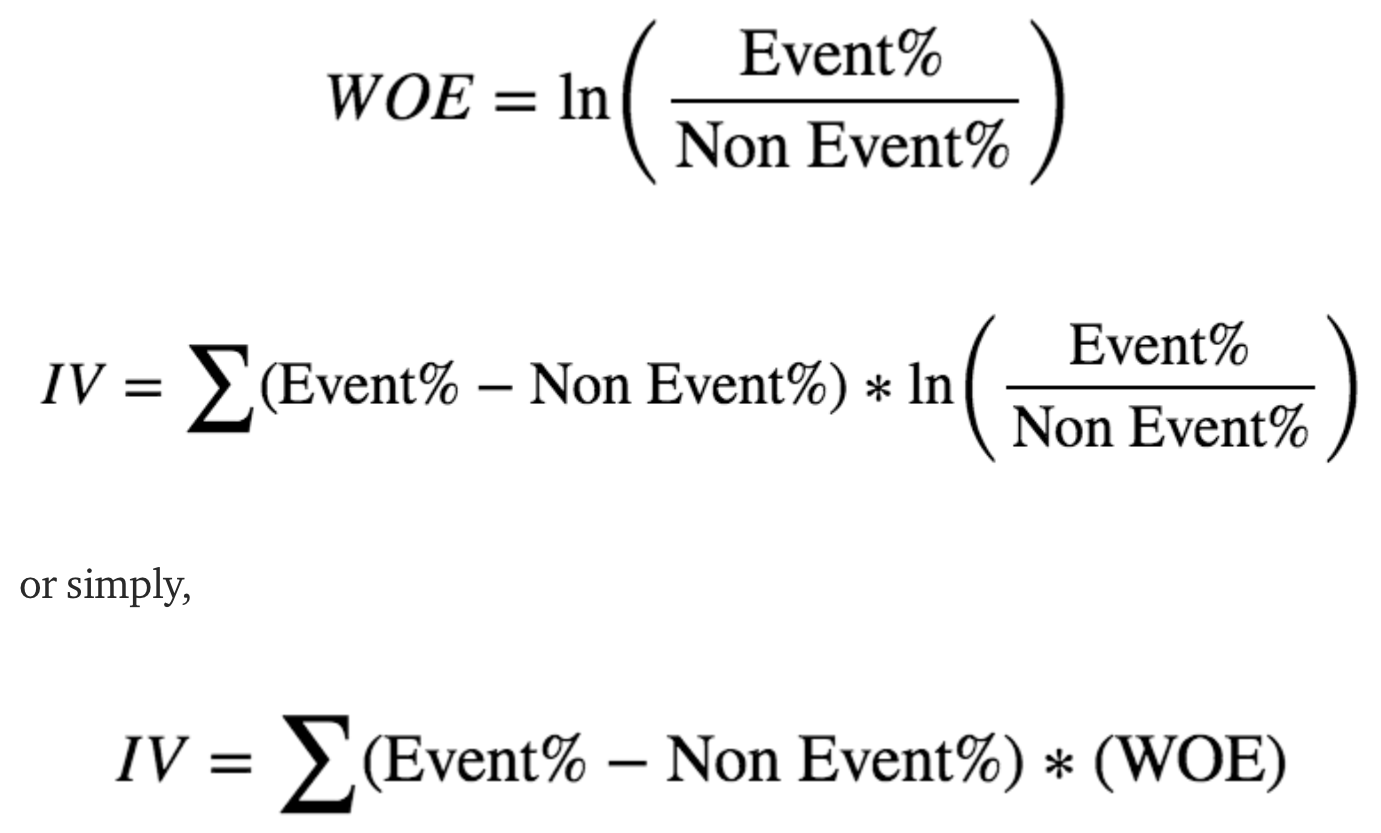

In [2]:
Image('/content/drive/MyDrive/Demo Images/File_123.png')

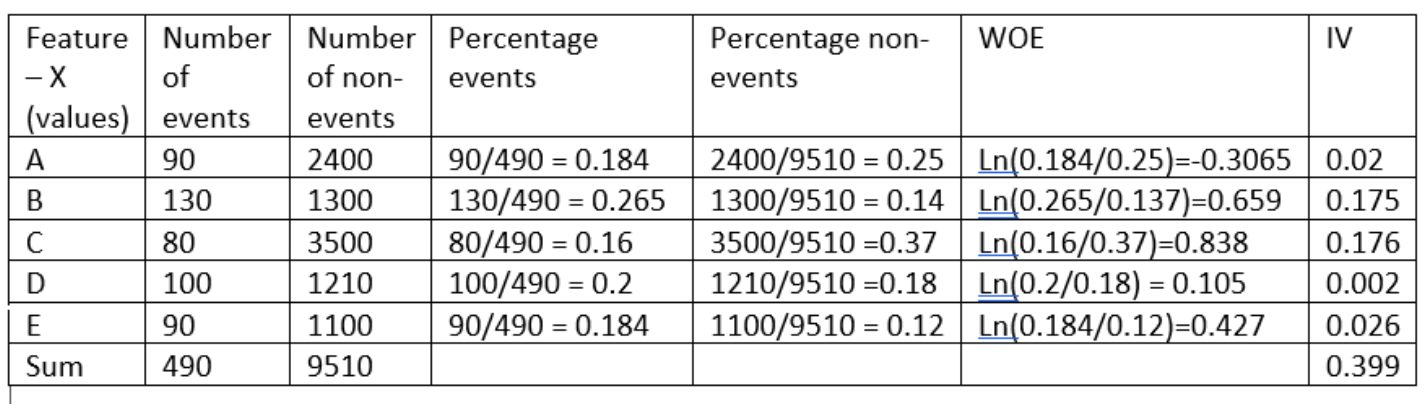

In [3]:
Image('/content/drive/MyDrive/Demo Images/File_124.png')

**Weight of Evidence**

- The weight of evidence tells the predictive power of a single feature concerning its independent feature. 

- If any of the categories/bins of a feature has a large proportion of events compared to the proportion of non-events, we will get a high value of WoE which in turn says that that class of the feature separates the events from non-events.

- For example, consider category C of the feature X in the above example, the proportion of events (0.16) is very small compared to the proportion of non-events(0.37). This implies that if the value of the feature X is C, it is more likely that the target value will be 0 (non-event). 

The WoE value only tells us how confident we are that the feature will help us predict the probability of an event correctly.

**Now that we know that WoE measures the predictive power of every bin/category of a feature, what are the other benefits of WoE?**

1. *WoE imputation*
  - WoE values for the various categories of a categorical variable can be used to impute a categorical feature and convert it into a numerical feature as a logistic regression model requires all its features to be numerical.
  - On careful examination of the formula of WoE and the logistic regression equation to be solved, we see that the WoE of a feature has a linear relationship with the log odds. This ensures that the requirement of the features having linear relation with the log odds is satisfied.

2. *WoE as a Variable* 
  - For the same reason as above, if a continuous feature does not have a linear relationship with the log odds, the feature can be binned into groups and a new feature created by replaced each bin with its WoE value can be used instead of the original feature. 
  - Hence WoE is a good variable transformation method for logistic regression.

3. *Linear and Non Linear relationship with Target*
  - On arranging a numerical feature in ascending order, if the WoE values are all linear, we know that the feature has the right linear relation with the target. 
  - However, if the feature’s WoE is non-linear, we should either discard it or consider some other variable transformation to ensure the linearity. Hence WoE gives us a tool to check for the linear relationship with the dependent feature.

4. *WoE is better than one-hot encoding* 
  - One-hot encoding will need you to create h-1 new features to accommodate one categorical feature with h categories. 
  - This implies that the model will not have to predict h-1 coefficients (bi) instead of 1. 
  - However, in WoE variable transformation, we will need to calculate a single coefficient for the feature in consideration.



**Why combine categories with similar WOE?**

- It is because the categories with similar WOE have almost same proportion of events and non-events. 
- In other words, the behavior of both the categories is same.

**Rules related to WOE**
1. Each category (bin) should have at least 5% of the observations.
2. Each category (bin) should be non-zero for both non-events and events.
3. The WOE should be distinct for each category. Similar groups should be aggregated.
4. The WOE should be monotonic, i.e. either growing or decreasing with the groupings.
5. Missing values are binned separately.

**Number of Bins (Groups)**
- In general, 10 or 20 bins are taken. Ideally, each bin should contain at least 5% cases. The number of bins determines the amount of smoothing - the fewer bins, the more smoothing. 
- If someone asks you ' "why not to form 1000 bins?" The answer is the fewer bins capture important patterns in the data, while leaving out noise. 
- Bins with less than 5% cases might not be a true picture of the data distribution and might lead to model instability.

**Handle Zero Event/ Non-Event**
- If a particular bin contains no event or non-event, you can use the formula below to ignore missing WOE. - We are adding 0.5 to the number of events and non-events in a group.

      AdjustedWOE = ln (((Number of non-events in a group + 0.5) / Number of non-events)) / ((Number of events in a group + 0.5) / Number of events))

**How to check correct binning with WOE**

1. The WOE should be monotonic i.e. either growing or decreasing with the bins. You can plot WOE values and check linearity on the graph.
2. Perform the WOE transformation after binning. Next, we run logistic regression with 1 independent variable having WOE values. If the slope is not 1 or the intercept is not ln(% of non-events / % of events) then the binning algorithm is not good. 

**Benefits of WOE**

1. *It can treat outliers.* Suppose you have a continuous variable such as annual salary and extreme values are more than 500 million dollars. These values would be grouped to a class of (let's say 250-500 million dollars). Later, instead of using the raw values, we would be using WOE scores of each classes.
2. *It can handle missing values* as missing values can be binned separately.
3. Since WOE Transformation handles categorical variable so there is *no need for dummy variables*.
WoE transformation helps you to build strict linear relationship with log odds. Otherwise it is not easy to accomplish linear relationship using other transformation methods such as log, square-root etc. In short, if you would not use WOE transformation, you may have to try out several transformation methods to achieve this.

**Information Value	Variable Predictiveness**
1. *Not useful* for prediction = Less than 0.02	
2. *Weak* predictive Power     = 0.02 to 0.1	
3. *Medium* predictive Power   = 0.1 to 0.3	
4. *Strong* predictive Power   = 0.3 to 0.5	
5. *Suspicious* Predictive Power >0.5	

**IV statistic is:**
1. Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
2. 0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
3. 0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
4. 0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
5. Information Value > 0.5, suspicious relationship (Check once)

**Important Points**
- Information value increases as bins / groups increases for an independent variable. 
  - Be careful when there are more than 20 bins as some bins may have a very few number of events and non-events.
- Information value is not an optimal feature (variable) selection method when you are building a classification model other than binary logistic regression (for eg. random forest or SVM) as conditional log odds (which we predict in a logistic regression model) is highly related to the calculation of weight of evidence. 
  - In other words, it's designed mainly for binary logistic regression model. 
  - Also think this way - Random forest can detect non-linear relationship very well so selecting variables via Information Value and using them in random forest model might not produce the most accurate and robust predictive model.

In [4]:
#Load Required Packages
import pandas as pd
import numpy as np

#Read Data
mydata = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
mydata.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
#Python Function to calculate Information Value and WOE
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

# In this user-defined function, there are 4 parameters user needs to mention.

# data means data frame in which dependent and independent variable(s) are stored.
# target refers to name of dependent variable.
# bins refers to number of bins or intervals. By default, it is 10.
# show_woe = True means you want to print the WOE calculation Table. By default, it is False

# How to run Function
# It returns two dataframes named iv and woe which contains Information value and WOE of all the variables.
iv, woe = iv_woe(data = mydata, target = 'admit', bins=10, show_woe = True)

# Important Points related to Python Script 
# Dependent variable specified in target parameter must be binary. 
# 1 refers to event. 
# 0 refers to non-event.
# All numeric variables having no. of unique values less than or equal to 10 
# are considered as a categorical variable. 
# You can change the cutoff in the code len(np.unique(data[ivars]))>10


Information value of gre is 0.312882
  Variable            Cutoff   N  ...  % of Non-Events       WoE        IV
0      gre  (219.999, 440.0]  48  ...         0.153846 -1.180625  0.125857
1      gre    (440.0, 500.0]  51  ...         0.142857 -0.413370  0.019994
2      gre    (500.0, 520.0]  24  ...         0.051282  0.428812  0.011774
3      gre    (520.0, 560.0]  51  ...         0.131868 -0.110184  0.001516
4      gre    (560.0, 580.0]  29  ...         0.084249 -0.578450  0.021406
5      gre    (580.0, 620.0]  53  ...         0.117216  0.344071  0.016563
6      gre    (620.0, 660.0]  45  ...         0.102564  0.266294  0.008333
7      gre    (660.0, 680.0]  20  ...         0.040293  0.564614  0.017262
8      gre    (680.0, 740.0]  44  ...         0.117216 -0.215545  0.004899
9      gre    (740.0, 800.0]  35  ...         0.058608  0.937135  0.085278

[10 rows x 9 columns]
Information value of gpa is 0.27002
  Variable          Cutoff   N  ...  % of Non-Events       WoE        IV
0     

In [6]:
# Variable wise Information Value
iv

# Inference 
# Strong Predictive Power - GRE
# Medium Predictive Power - GPA, Rank

,Variable,IV
0,gre,0.312882
0,gpa,0.270020
0,rank,0.292044
